Author: Liam Cobb

Student Number: A00090005

Tasks: Baseline model, Models & training, Validation, Evaluation, Error analysis & insights

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
#read in previously cleaned dataset
file_path = "Cleaned_Financials.csv"
df = pd.read_csv(file_path)

In [25]:
print(df.isnull().sum())
#null values from profit not removed

Segment                 0
Country                 0
Product                 0
Discount Band          53
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts              53
Sales                   0
COGS                    0
Profit                 63
Date                    0
Month Number            0
Month Name              0
Year                    0
Month                   0
dtype: int64


In [26]:
#dropping null values from profit
df = df.dropna(subset=['Profit'])

In [27]:
print(df.isnull().sum())

Segment                 0
Country                 0
Product                 0
Discount Band          53
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts              53
Sales                   0
COGS                    0
Profit                  0
Date                    0
Month Number            0
Month Name              0
Year                    0
Month                   0
dtype: int64


# Baseline model: linear regression

In [28]:
#only using numeric as categorical columns require encoding for use
numeric_features = ['Sale Price', 'Units Sold', 'Manufacturing Price', 'COGS']

X = df[numeric_features]
y = df['Profit']

#80 20 training split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [29]:
# Create a linear regression model
model = LinearRegression()
# Fit the model on the training data
model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(X_test)
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



# Evaluation of linear regression

In [30]:

#display coeficients to understand relationships
print("Regression coefficients:")
print("Intercept:", model.intercept_)
for feature, coefficient in zip(numeric_features, model.coef_):
    print(f"{feature}: {coefficient}")

print("\nLinear regression Performance:")
print(f"Mean squared srror: {mse:.2f}")
print(f"Root mean squared error: {rmse:,.2f}")
print(f"Mean absolute error: {mae:,.2f}")
print(f"R-squared score: {r2:.4f}")

Regression coefficients:
Intercept: -4981.333810269509
Sale Price: 47.74083451612354
Units Sold: 4.6733413290367105
Manufacturing Price: 10.47960173953419
COGS: 0.13405372579034758

Linear regression Performance:
Mean squared srror: 557788287.63
Root mean squared error: 23,617.54
Mean absolute error: 14,184.09
R-squared score: 0.6711


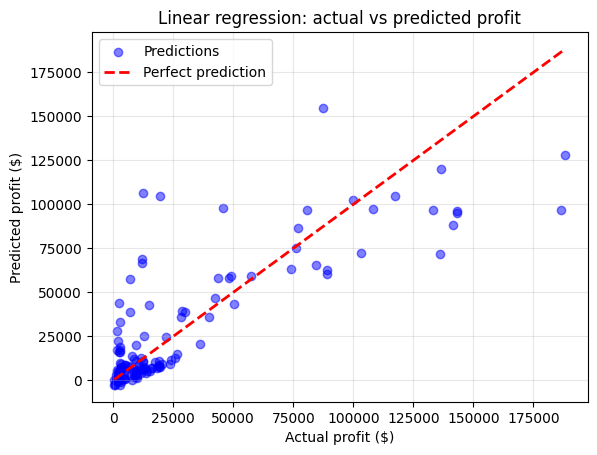

In [31]:
#scatterplot showing predicted vs actual values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Perfect prediction')
plt.title('Linear regression: actual vs predicted profit')
plt.xlabel('Actual profit ($)')
plt.ylabel('Predicted profit ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Advanced Model: Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

#train random forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [33]:
#make predictions on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation of Random Forest

In [34]:
#calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [35]:
#display random forest metrics
print("\nRandom Forest Performance:")
print(f"Mean squared error: {mse_rf:.2f}")
print(f"Root mean squared error: {rmse_rf:,.2f}")
print(f"Mean absolute error: {mae_rf:,.2f}")
print(f"R-squared score: {r2_rf:.4f}")


Random Forest Performance:
Mean squared error: 233555374.26
Root mean squared error: 15,282.52
Mean absolute error: 7,168.82
R-squared score: 0.8623


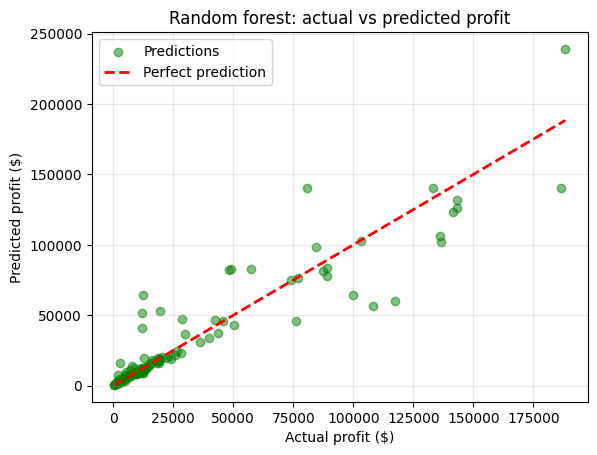

In [36]:
#random forest actual vs predicted
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Perfect prediction')
plt.title('Random forest: actual vs predicted profit')
plt.xlabel('Actual profit ($)')
plt.ylabel('Predicted profit ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Model Comparison

In [37]:
#model comparison summary
comparison_df = pd.DataFrame({
    'Model': ['Linear regression (Baseline)', 'Random Forest'],
    'R-squared score': [r2, r2_rf],
    'RMSE ($)': [rmse, rmse_rf],
    'MAE ($)': [mae, mae_rf]
})
print("Model performance comparison")
print(comparison_df.to_string(index=False))

Model performance comparison
                       Model  R-squared score     RMSE ($)      MAE ($)
Linear regression (Baseline)         0.671080 23617.541947 14184.091585
               Random Forest         0.862276 15282.518584  7168.816531


RF achieves 28.5% better R2 and 35% lower RMSE - significant improvement showing non-linear relationships matter.
Practical Impact:

RF saves ~$7k in prediction error per product

RF Captures interactions Linear Regression misses

R2 Interpretation: RF explains 86% of profit variance vs LR's 67%
RF captures 19% more profit patterns.

# Model Cross Evaluation

In [38]:
#5 fold cross vlidation on LR
from sklearn.model_selection import cross_val_score
lr_cv_scores = cross_val_score(model, X_train, y_train, cv=5,
                                scoring='r2', n_jobs=-1)
lr_cv_rmse = cross_val_score(model, X_train, y_train, cv=5,
                              scoring='neg_root_mean_squared_error', n_jobs=-1)

#display cross validation results for LR
print("\nLinear regression cross validation:")
print(f"R-squared scores: {lr_cv_scores}")
print(f"Mean R-squared: {lr_cv_scores.mean():.4f} (+/- {lr_cv_scores.std() * 2:.4f})")
print(f"Mean RMSE: ${-lr_cv_rmse.mean():,.2f}")


Linear regression cross validation:
R-squared scores: [0.62520548 0.64917083 0.68005879 0.59540993 0.68736215]
Mean R-squared: 0.6474 (+/- 0.0685)
Mean RMSE: $25,609.98



Mean R2: 0.6474 - explains 65% of profit variance

Std: +-0.0685 - reasonably consistent across folds



In [39]:
#5 fold CV on RF
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5,
                                scoring='r2', n_jobs=-1)
rf_cv_rmse = cross_val_score(rf_model, X_train, y_train, cv=5,
                              scoring='neg_root_mean_squared_error', n_jobs=-1)

#CV results for RF
print("\nRandom forest cross validation:")
print(f"R-squared scores: {rf_cv_scores}")
print(f"Mean R-squared: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")
print(f"Mean RMSE: ${-rf_cv_rmse.mean():,.2f}")


Random forest cross validation:
R-squared scores: [0.91759391 0.85583318 0.88113111 0.89397446 0.79049681]
Mean R-squared: 0.8678 (+/- 0.0870)
Mean RMSE: $15,381.29


Mean R2: 0.8678 - explains 87% of profit variance

34% improvement over baseline

RMSE: $15,381 - 40% lower error than Linear Regression

Std: +-0.0870 - slightly more variable but still good

# Hyperperameters

In [40]:
from sklearn.model_selection import GridSearchCV

#perameter grid for search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#geidsearch with 5-fold cross validation
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

#fit search to best hyperperameters
grid_search.fit(X_train, y_train)

#best performance
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV R-squared: {grid_search.best_score_:.4f}")

#test tuned model on test set
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)
r2_tuned = r2_score(y_test, y_pred_tuned)
print(f"Test R-squared: {r2_tuned:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best CV R-squared: 0.8886
Test R-squared: 0.8535


Hyperparameter tuning improved CV performance but decreased test performance, indicating overfitting to training folds. The default perameters will be chosen.

In [41]:
#full comparison with tuning
full_comparison = pd.DataFrame({
    'Model': ['Linear regression', 'RF (Default)', 'RF (Tuned)'],
    'Test R-squared': [r2, r2_rf, r2_tuned],
    'CV R-squared': [lr_cv_scores.mean(), rf_cv_scores.mean(), grid_search.best_score_],
    'Test RMSE': [rmse, rmse_rf, np.sqrt(mean_squared_error(y_test, y_pred_tuned))]
})

print("Comparison of models")

print(full_comparison.to_string(index=False))



Comparison of models
            Model  Test R-squared  CV R-squared    Test RMSE
Linear regression        0.671080      0.647441 23617.541947
     RF (Default)        0.862276      0.867806 15282.518584
       RF (Tuned)        0.853548      0.888580 15759.300170


The default random forest has the highest test R2 score

# Feature importance

In [42]:
#find feature importance for random forest
lr_importance = pd.DataFrame({
    'Feature': numeric_features,
    'Coefficient': model.coef_,
    'Importance': np.abs(model.coef_)
}).sort_values('Importance', ascending=False)

print("Linear regression feature importance:")
print(lr_importance)

Linear regression feature importance:
               Feature  Coefficient  Importance
0           Sale Price    47.740835   47.740835
2  Manufacturing Price    10.479602   10.479602
1           Units Sold     4.673341    4.673341
3                 COGS     0.134054    0.134054


In [43]:
#calculate feature importance for random forest
rf_importance = pd.DataFrame({
    'Feature': numeric_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom forest feature importance:")
print(rf_importance)


Random forest feature importance:
               Feature  Importance
3                 COGS    0.684941
0           Sale Price    0.201640
1           Units Sold    0.096384
2  Manufacturing Price    0.017034


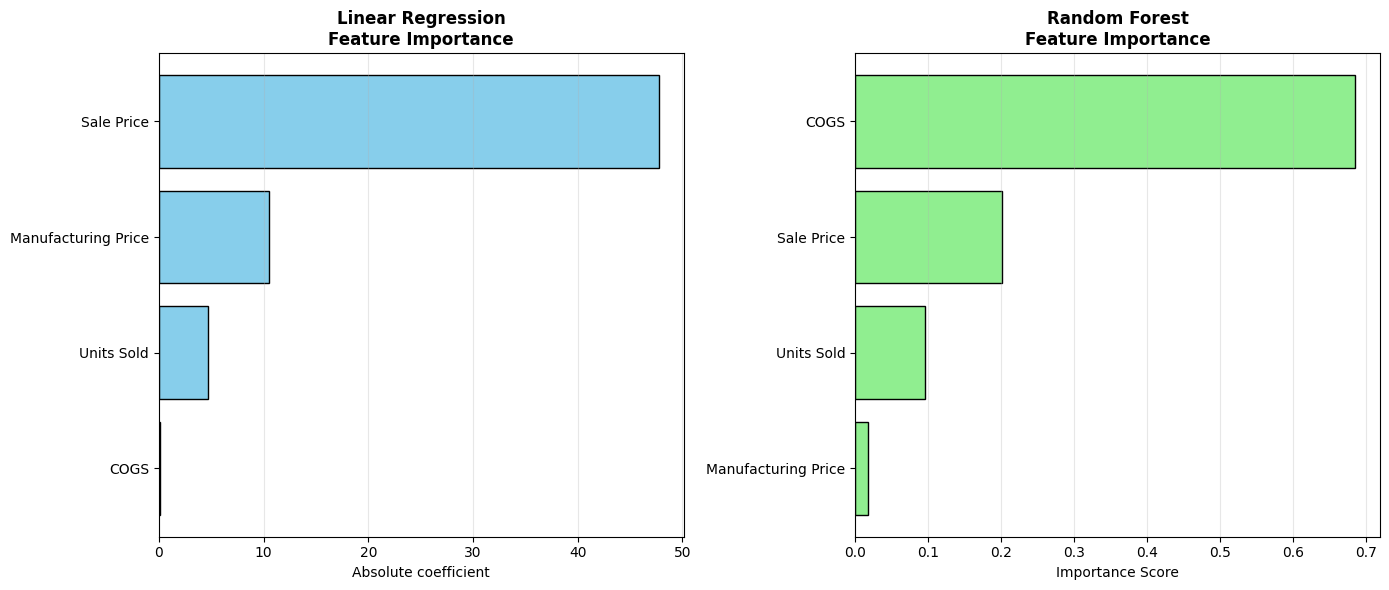

In [44]:
#feature importance comparison graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#linear plot
lr_sorted = lr_importance.sort_values('Importance', ascending=True)
ax1.barh(lr_sorted['Feature'], lr_sorted['Importance'], color='skyblue', edgecolor='black')
ax1.set_xlabel('Absolute coefficient')
ax1.set_title('Linear regression\nFeature importance', fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

#forest plot
rf_sorted = rf_importance.sort_values('Importance', ascending=True)
ax2.barh(rf_sorted['Feature'], rf_sorted['Importance'], color='lightgreen', edgecolor='black')
ax2.set_xlabel('Importance score')
ax2.set_title('Random forest\nFeature importance', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

INSIGHT: LR prioritizes Sale Price (linear), RF identifies COGS (non-linear interactions)

# Error analysis of RF

In [45]:
#calculate prediction errors
residuals = y_test.values - y_pred_rf
abs_errors = np.abs(residuals)
percent_errors = (abs_errors / np.abs(y_test.values)) * 100

#display error stats
print("error statistics")

print(f"Mean absolute error: ${abs_errors.mean():,.2f}")
print(f"Median absolute wrror: ${np.median(abs_errors):,.2f}")
print(f"Max error: ${abs_errors.max():,.2f}")
print(f"Mean percentage error: {percent_errors.mean():.2f}%")

ERROR STATISTICS
Mean Absolute Error: $7,168.82
Median Absolute Error: $1,021.23
Max Error: $59,754.21
Mean Percentage Error: 33.86%


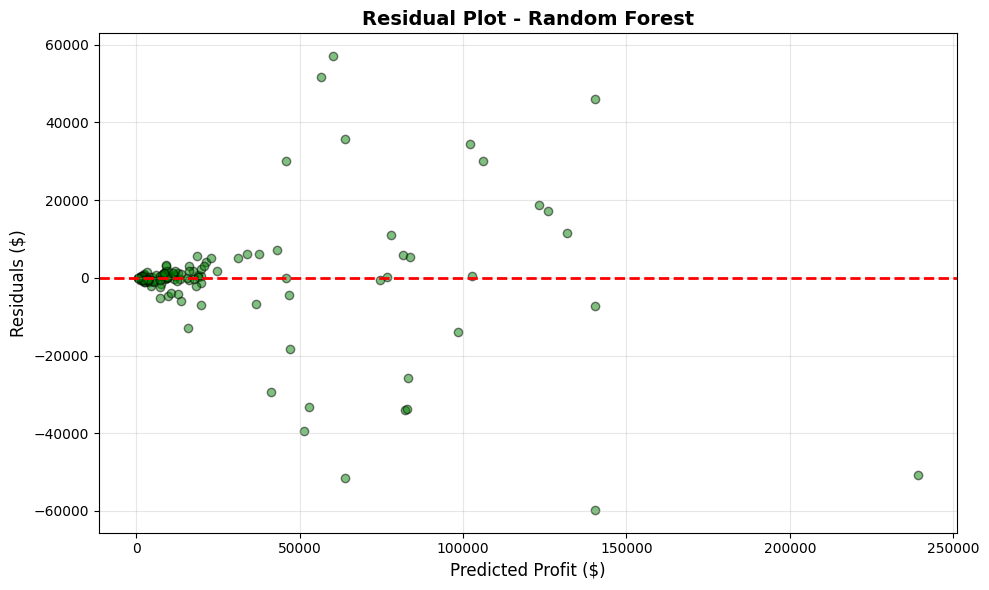

In [46]:
#plot risiduals
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5, edgecolor='black', color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted profit ($)', fontsize=12)
plt.ylabel('Residuals ($)', fontsize=12)
plt.title('Residual plot - random forest', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Model is reliable for majority of predictions (median $1k error), but struggles with edge cases that create large errors and skew the mean.

In [47]:
#df of all predictions with error mettrics
error_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_rf,
    'Abs_Error': abs_errors,
    'Pct_Error': percent_errors
}, index=y_test.index)

#best and worst predictions
print("Where model fails - 10 largest errors:")
print(error_df.nlargest(10, 'Abs_Error'))

print("\nWhere model succeeds - 10 best predictions:")
print(error_df.nsmallest(10, 'Abs_Error'))

WHERE MODEL FAILS - Top 10 Largest Errors:
       Actual      Predicted     Abs_Error   Pct_Error
679   80662.5  140416.714405  59754.214405   74.079299
72   117406.0   60339.009917  57066.990083   48.606536
69   108147.0   56484.865774  51662.134226   47.770289
695   12375.0   64013.691274  51638.691274  417.282354
353  188378.0  239117.890000  50739.890000   26.935146
82   186407.5  140416.714405  45990.785595   24.672176
655   11968.0   51389.485333  39421.485333  329.390753
155   99814.5   64038.340489  35776.159511   35.842648
81   136535.0  102043.203000  34491.797000   25.262238
645   48257.0   82398.730000  34141.730000   70.749798

WHERE MODEL SUCCEEDS - Top 10 Best Predictions:
       Actual     Predicted   Abs_Error  Pct_Error
446    493.20    522.919667   29.719667   6.025885
472  45880.00  45849.834346   30.165654   0.065749
556   9370.80   9331.525945   39.274055   0.419111
86    2486.25   2543.895682   57.645682   2.318579
636   1761.54   1847.898032   86.358032   4.9024

# Where model Fails:

Extreme overestimation on low proffit items seen in rows 679, 695, 655: (74-417% error)

High profit underestimation on rows 72, 69, 353: (25-48% error)

# Where model succeed:

Mid range proffits (500-50k)

Typical configurations - Standard price/COGS/units combinations

Best case - 45,880 predicted as 45,850 (0.07% error)


# Root causes:

Training data lacks extreme profit examples

Non-linear patterns in outlier cases (very high/low margins)

Possible data quality issues (417% error suggests bad data)

# Our project idea: example prediction

In [48]:
#example prediction
example_input = pd.DataFrame({
    'Sale Price': [15],
    'Units Sold': [1000],
    'Manufacturing Price': [12],
    'COGS': [12]
})

#profit prediction using Random Forest model
predicted_profit = rf_model.predict(example_input)[0]

#display prediction
print(f"\nRandom Forest Prediction: ${predicted_profit:,.2f}")


Random Forest Prediction: $6,889.72
